In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import matplotlib as mpl

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
S = np.load("../data/S.npy")
P = np.load("../data/P.npy")
F = np.load("../data/F.npy")

molecules = np.load("../data/molecules.npy")

In [3]:
from SCFInitialGuess.utilities.dataset import Dataset

dim = 26

ind_cut = 150
index = np.arange(200)

S_test = np.array(S)[index[150:]]
P_test = np.array(P)[index[150:]]
F_test = np.array(F)[index[150:]]
molecules_test = [molecules[index[i]] for i in range(150, 200)]

S_train = np.array(S)[index[:150]]
P_train = np.array(P)[index[:150]]
F_train = np.array(F)[index[:150]]
molecules_train = [molecules[index[i]] for i in range(150)]

dataset = Dataset(np.array(S_train), np.array(F_train), split_test=0.0)

dataset.testing = (Dataset.normalize(S_test, mean=dataset.x_mean, std=dataset.x_std)[0], F_test)

[-] 2018-05-13 20:31:59: Data set normalized. Mean value std: 0.008732722987069362


In [18]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import Trainer, RegularizedMSE, MSE

trainer = Trainer(
    EluTrNNN([dim**2, 2 * dim**2, 2 * dim**2, dim**2, dim**2, dim**2]),
    cost_function=MSE(),
    #cost_function=RegularizedMSE(alpha=1e-7),
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3)
)

trainer.setup()
network, sess = trainer.train(
    dataset,
    convergence_threshold=1e-6
)
graph = trainer.graph

[-] 2018-05-13 21:10:56: No target graph specified for Trainer setup. Creating new graph ...
[-] 2018-05-13 21:10:56: Setting up the training in the target graph ...
[-] 2018-05-13 21:10:56: network ...
[-] 2018-05-13 21:10:56: error function ...
[-] 2018-05-13 21:10:56: cost function ...
[-] 2018-05-13 21:10:56: training step
[-] 2018-05-13 21:10:56: Starting network training ...
[ ] 2018-05-13 21:10:56: Val. Cost: 8.982E-01. Error: 8.982E-01. Diff: 1.0E+10
[ ] 2018-05-13 21:11:03: Val. Cost: 6.385E-04. Error: 6.385E-04. Diff: 9.0E-01
[ ] 2018-05-13 21:11:11: Val. Cost: 2.367E-04. Error: 2.367E-04. Diff: 4.0E-04
[ ] 2018-05-13 21:11:22: Val. Cost: 1.364E-04. Error: 1.364E-04. Diff: 1.0E-04
[ ] 2018-05-13 21:11:31: Val. Cost: 1.382E-04. Error: 1.382E-04. Diff: 1.9E-06
[ ] 2018-05-13 21:11:38: Val. Cost: 7.735E-05. Error: 7.735E-05. Diff: 6.1E-05
[ ] 2018-05-13 21:11:44: Val. Cost: 1.241E-04. Error: 1.241E-04. Diff: 4.7E-05
[ ] 2018-05-13 21:11:50: Val. Cost: 7.955E-05. Error: 7.955E-05

# Calculate density matrices 

In [6]:
from pyscf.scf import hf

def get_occ(mo_energy, mo_coeff, n_electrons = 30):
    
    
    e_idx = np.argsort(mo_energy)
    e_sort = mo_energy[e_idx]
    nmo = mo_energy.size
    mo_occ = np.zeros(nmo)
    nocc = n_electrons // 2
    mo_occ[e_idx[:nocc]] = 2
    
    return mo_occ

def make_density(s, f):
        mo_energy, mo_coeff = hf.eig(f.reshape(dim, dim), s.reshape(dim, dim))
        mo_occ = get_occ(mo_energy, mo_coeff)
        return hf.make_rdm1(mo_coeff, mo_occ)
    
with graph.as_default():
    p_f = np.array(
        [make_density(s, f).reshape(dim**2) for (s,f) in zip(S_test, network.run(sess, dataset.testing[0]))]
    )

# Scatter

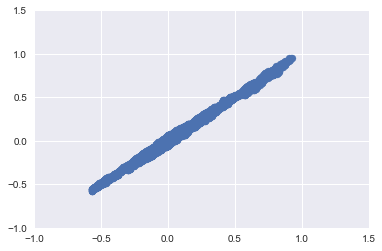

In [12]:
lower, upper = -1, 1.5

plt.scatter(P_test.flatten(), p_f.flatten())

plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.show()

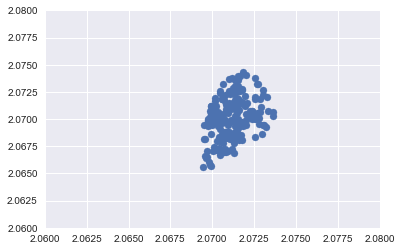

In [14]:
lower, upper = 2.06, 2.08

plt.scatter(P_test.flatten(), p_f.flatten())

plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.show()

# Analysis 

In [15]:
from SCFInitialGuess.utilities.analysis import measure_all_quantities, mf_initializer

n_electrons = 30

results = measure_all_quantities(
    p_f,
    dataset,
    molecules,
    n_electrons,
    mf_initializer,
    dim,
    is_triu=False    
)

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

[ ] 2018-05-13 20:50:24: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:24: Iteration calculation: 1
[ ] 2018-05-13 20:50:24: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:25: Iteration calculation: 3
[ ] 2018-05-13 20:50:25: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:25: Iteration calculation: 5
[ ] 2018-05-13 20:50:25: Iteration calculation: 6


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:25: Iteration calculation: 7
[ ] 2018-05-13 20:50:25: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:25: Iteration calculation: 9
[ ] 2018-05-13 20:50:26: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:26: Iteration calculation: 11
[ ] 2018-05-13 20:50:26: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:26: Iteration calculation: 13
[ ] 2018-05-13 20:50:26: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:26: Iteration calculation: 15
[ ] 2018-05-13 20:50:26: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:27: Iteration calculation: 17
[ ] 2018-05-13 20:50:27: Iteration calculation: 18


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:27: Iteration calculation: 19
[ ] 2018-05-13 20:50:27: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:27: Iteration calculation: 21
[ ] 2018-05-13 20:50:27: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:27: Iteration calculation: 23
[ ] 2018-05-13 20:50:28: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:28: Iteration calculation: 25
[ ] 2018-05-13 20:50:28: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:28: Iteration calculation: 27
[ ] 2018-05-13 20:50:28: Iteration calculation: 28


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:28: Iteration calculation: 29
[ ] 2018-05-13 20:50:28: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:29: Iteration calculation: 31
[ ] 2018-05-13 20:50:29: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:29: Iteration calculation: 33
[ ] 2018-05-13 20:50:29: Iteration calculation: 34


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:29: Iteration calculation: 35
[ ] 2018-05-13 20:50:29: Iteration calculation: 36


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:29: Iteration calculation: 37
[ ] 2018-05-13 20:50:30: Iteration calculation: 38


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:30: Iteration calculation: 39
[ ] 2018-05-13 20:50:30: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:30: Iteration calculation: 41
[ ] 2018-05-13 20:50:30: Iteration calculation: 42


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:30: Iteration calculation: 43
[ ] 2018-05-13 20:50:30: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:31: Iteration calculation: 45
[ ] 2018-05-13 20:50:31: Iteration calculation: 46


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:31: Iteration calculation: 47
[ ] 2018-05-13 20:50:31: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-13 20:50:31: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [16]:
from SCFInitialGuess.utilities.analysis import make_results_str

print(make_results_str(results))

--- Absolute Error ---
3.18716E-01 +- 5.57252E-03
--- Symmetry Error ---
1.50243E-18 +- 3.19455E-19
--- Idempotence Error ---
3.13445E-16 +- 3.78381E-17
--- Occupance Error ---
6.82121E-15 +- 6.02245E-15
--- HF Energy Error ---
3.16903E+03 +- 3.77645E+01
--- Avg. Iterations ---
1.58800E+01 +- 2.49512E+00

